In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import preprocessing

In [2]:
df = pd.read_csv('./pre_rec_single_class_any_filtered_with_fpr.csv')

In [3]:
print(df)

                    Class  Precision    Recall  False Positive Rate
0                Aircraft   0.877622  0.908323             0.001089
1               Auto part   0.652551  0.731233             0.021730
2                    Ball   0.737475  0.696970             0.001354
3                    Bear   0.726667  0.672840             0.000422
4                     Bed   0.535433  0.775665             0.001825
5                  Beetle   0.804688  0.695946             0.000257
6                    Bird   0.914756  0.896434             0.001796
7                    Boat   0.776715  0.924099             0.004389
8                Building   0.697113  0.870042             0.055250
9                     Car   0.808747  0.918969             0.014124
10              Carnivore   0.933449  0.882401             0.001613
11               Clothing   0.841033  0.821660             0.092786
12              Container   0.690960  0.559591             0.004617
13                  Couch   0.518939  0.501832  

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
df[['False Positive Rate']] = min_max_scaler.fit_transform(df[['False Positive Rate']])

In [6]:
df = df.sort_values(by='False Positive Rate', ascending=True)
print(df)

                    Class  Precision    Recall  False Positive Rate
37                 Racket   0.878788  0.798165             0.000000
51                 Turtle   0.781250  0.833333             0.000999
42         Squash (Plant)   0.783505  0.730769             0.000999
5                  Beetle   0.804688  0.695946             0.001445
36       Plumbing fixture   0.848649  0.568841             0.001782
28   Marine invertebrates   0.827778  0.768041             0.002113
29          Marine mammal   0.812834  0.734300             0.002558
3                    Bear   0.726667  0.672840             0.003223
25      Kitchen appliance   0.657534  0.548571             0.004224
40              Shellfish   0.619403  0.614815             0.004333
38                Reptile   0.844828  0.718826             0.004683
30  Moths and butterflies   0.861171  0.888143             0.005800
45              Telephone   0.733138  0.776398             0.008797
48           Traffic sign   0.613445  0.772487  

In [7]:
fpr = df['False Positive Rate']
tpr = df['Recall']
roc_auc = auc(fpr, tpr)
max_fpr = fpr.max()

print('AUC: ', roc_auc) 
print('Max FPR: ', max_fpr)

AUC:  0.7996028354485911
Max FPR:  1.0


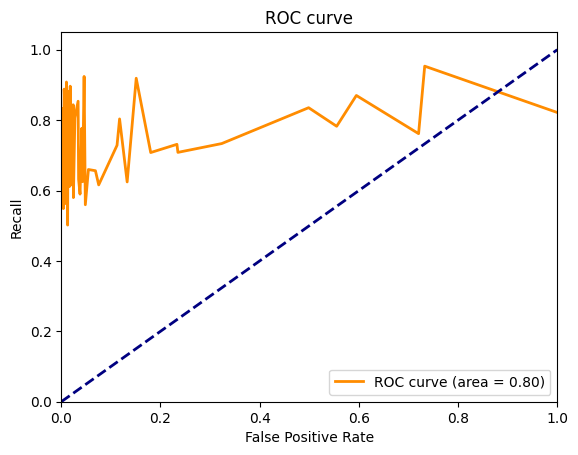

In [8]:
#draw ROC curve


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

